In [54]:
import numpy as np
from numpy import array
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

### Get the data

In [2]:
from NLP_Natural_Disasters.data import get_data, clean_data

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
train_df = get_data()
cleaned_df = clean_data(train_df)

cleaned_df.head()

,id,text,target
0,1,deed reason earthquake may allah forgive u,1
1,4,forest fire near la canada,1
2,5,resident asked shelter place officer evacuation shelter place order expected,1
3,6,people receive wildfire evacuation order california,1
4,7,got sent photo alaska smoke wildfire school,1


### Classify on the target 1

Clean DF with only target == 1

In [25]:
target_1 = cleaned_df[cleaned_df['target']==1]
target_1

,id,text,target
0,1,deed reason earthquake may allah forgive u,1
1,4,forest fire near la canada,1
2,5,resident asked shelter place officer evacuation shelter place order expected,1
3,6,people receive wildfire evacuation order california,1
4,7,got sent photo alaska smoke wildfire school,1
...,...,...,...
7608,10869,two giant crane holding bridge collapse nearby home,1
7609,10870,control wild fire california even northern part state troubling,1
7610,10871,utckm volcano hawaii,1
7611,10872,police investigating ebike collided car little portugal ebike rider suffered serious nonlife threatening injury,1


### Analyse - Countvectorizer

In [47]:
target_1['text']

0                                                                            deed reason earthquake may allah forgive u
1                                                                                            forest fire near la canada
2                                          resident asked shelter place officer evacuation shelter place order expected
3                                                                   people receive wildfire evacuation order california
4                                                                           got sent photo alaska smoke wildfire school
                                                             ...                                                       
7608                                                                two giant crane holding bridge collapse nearby home
7609                                                    control wild fire california even northern part state troubling
7610                                    

In [26]:
# grab the Serie 'text'
# convert to a list
list_tweet = target_1['text'].tolist()
list_tweet

['deed reason earthquake may allah forgive u',
 'forest fire near la canada',
 'resident asked shelter place officer evacuation shelter place order expected',
 'people receive wildfire evacuation order california',
 'got sent photo alaska smoke wildfire school',
 'rockyfire update california hwy closed due lake county fire cafire wildfire',
 'flood disaster heavy rain cause flash flooding street colorado spring area',
 'im top hill see fire wood',
 'there emergency evacuation happening building across street',
 'im afraid tornado coming area',
 'three people died heat wave far',
 'haha south tampa getting flooded hah wait second live south tampa gon na gon na flooding',
 'raining flooding florida tampa day ive lost count',
 'flood bago myanmar arrived bago',
 'damage school bus multi car crash breaking',
 'wholesale market ablaze',
 'breaking flag set ablaze aba',
 'inec office abia set ablaze',
 'jamaica uo two car set ablaze santa cruz uo head st elizabeth police',
 'west burned thou

In [27]:
# split() returns list of all the words in the string
tweet_words = [x.split() for x in list_tweet]
len(tweet_words) , tweet_words

(3268,
 [['deed', 'reason', 'earthquake', 'may', 'allah', 'forgive', 'u'],
  ['forest', 'fire', 'near', 'la', 'canada'],
  ['resident',
   'asked',
   'shelter',
   'place',
   'officer',
   'evacuation',
   'shelter',
   'place',
   'order',
   'expected'],
  ['people', 'receive', 'wildfire', 'evacuation', 'order', 'california'],
  ['got', 'sent', 'photo', 'alaska', 'smoke', 'wildfire', 'school'],
  ['rockyfire',
   'update',
   'california',
   'hwy',
   'closed',
   'due',
   'lake',
   'county',
   'fire',
   'cafire',
   'wildfire'],
  ['flood',
   'disaster',
   'heavy',
   'rain',
   'cause',
   'flash',
   'flooding',
   'street',
   'colorado',
   'spring',
   'area'],
  ['im', 'top', 'hill', 'see', 'fire', 'wood'],
  ['there',
   'emergency',
   'evacuation',
   'happening',
   'building',
   'across',
   'street'],
  ['im', 'afraid', 'tornado', 'coming', 'area'],
  ['three', 'people', 'died', 'heat', 'wave', 'far'],
  ['haha',
   'south',
   'tampa',
   'getting',
   'floode

In [45]:
# mylist = pd.DataFrame(tweet_words)
# mylist.sample(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
2500,watch,airport,get,swallowed,sandstorm,minute,None,None,None,None,None,None,None,None,None,None,None,None
567,scientist,donuat,believe,catastrophic,manmade,global,warming,None,None,None,None,None,None,None,None,None,None,None
2179,path,obliteration,back,dead,story,None,None,None,None,None,None,None,None,None,None,None,None,None
1524,put,flood,fire,top,list,None,None,None,None,None,None,None,None,None,None,None,None,None
120,stop,annihilation,salt,river,wild,horse,via,None,None,None,None,None,None,None,None,None,None,None


In [29]:
# list comprehension doesn't work with .extend ;)
listofwords = []
for word in tweet_words:
    listofwords.extend(word) 
    
listofwords

['deed',
 'reason',
 'earthquake',
 'may',
 'allah',
 'forgive',
 'u',
 'forest',
 'fire',
 'near',
 'la',
 'canada',
 'resident',
 'asked',
 'shelter',
 'place',
 'officer',
 'evacuation',
 'shelter',
 'place',
 'order',
 'expected',
 'people',
 'receive',
 'wildfire',
 'evacuation',
 'order',
 'california',
 'got',
 'sent',
 'photo',
 'alaska',
 'smoke',
 'wildfire',
 'school',
 'rockyfire',
 'update',
 'california',
 'hwy',
 'closed',
 'due',
 'lake',
 'county',
 'fire',
 'cafire',
 'wildfire',
 'flood',
 'disaster',
 'heavy',
 'rain',
 'cause',
 'flash',
 'flooding',
 'street',
 'colorado',
 'spring',
 'area',
 'im',
 'top',
 'hill',
 'see',
 'fire',
 'wood',
 'there',
 'emergency',
 'evacuation',
 'happening',
 'building',
 'across',
 'street',
 'im',
 'afraid',
 'tornado',
 'coming',
 'area',
 'three',
 'people',
 'died',
 'heat',
 'wave',
 'far',
 'haha',
 'south',
 'tampa',
 'getting',
 'flooded',
 'hah',
 'wait',
 'second',
 'live',
 'south',
 'tampa',
 'gon',
 'na',
 'gon',
 

In [ ]:
# Pass the split_it list to instance of Counter class.
Counter = Counter(listofwords)

# # most_common() mot fréquemment apparus et leur nombre
# most_occur = Counter.most_common(4)
# print(most_occur)

In [34]:
most_occur

[('fire', 263), ('u', 143), ('news', 138), ('via', 121)]

In [41]:
Counter.most_common()

[('fire', 263),
 ('u', 143),
 ('news', 138),
 ('via', 121),
 ('disaster', 118),
 ('california', 115),
 ('suicide', 110),
 ('police', 107),
 ('amp', 107),
 ('people', 106),
 ('family', 105),
 ('home', 100),
 ('train', 100),
 ('building', 94),
 ('killed', 93),
 ('like', 92),
 ('storm', 91),
 ('bomb', 90),
 ('crash', 89),
 ('pm', 89),
 ('hiroshima', 89),
 ('year', 86),
 ('wildfire', 80),
 ('flood', 79),
 ('emergency', 76),
 ('attack', 76),
 ('bombing', 75),
 ('car', 73),
 ('two', 72),
 ('video', 72),
 ('mh', 72),
 ('accident', 71),
 ('get', 70),
 ('nuclear', 70),
 ('one', 69),
 ('time', 69),
 ('say', 66),
 ('death', 65),
 ('northern', 64),
 ('burning', 64),
 ('dead', 63),
 ('legionnaire', 62),
 ('war', 60),
 ('bomber', 60),
 ('life', 59),
 ('still', 57),
 ('im', 56),
 ('new', 56),
 ('atomic', 56),
 ('collapse', 55),
 ('obama', 54),
 ('japan', 54),
 ('fatal', 54),
 ('today', 53),
 ('kill', 53),
 ('may', 50),
 ('forest', 50),
 ('debris', 50),
 ('dont', 50),
 ('warning', 50),
 ('watch', 50),

> I choose 3 main topics : urgent or not, suspect

>ngram_range of (1, 1) means only unigrams, (1, 2) means unigrams and bigrams, and (2, 2) means only bigrams.
Return a matrice , search words with the most occur : set as a nb of class n_   ; Buil a model with n group of topic

👇 **Train an LDA model to extract potential topics - Learn the vocabulary dictionary and return document-term matrix**

In [55]:
# one-gram with 3 topics : n_components=3
vectorizer = CountVectorizer(ngram_range=(1, 2))

data_vectorized = vectorizer.fit_transform(list_tweet)

lda_model = LatentDirichletAllocation(n_components=3)

lda_vectors = lda_model.fit_transform(data_vectorized)

**Visualize potential topics**

In [ ]:
def print_topics(model, vectorizer):
    """Print the words associated with the potential topics"""
    
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])

In [69]:
print_topics(lda_model, vectorizer)

Topic 0:
[('fire', 123.81323263677955), ('suicide', 110.30268642467487), ('california', 95.08889584455437), ('bomber', 60.33060797528378), ('suicide bomber', 59.33056391865174), ('wildfire', 57.430675459712425), ('attack', 54.3021386389953), ('home', 53.8125283380376), ('amp', 49.829121126981526), ('emergency', 46.14851076203427)]
Topic 1:
[('fire', 90.58709243640372), ('via', 46.142978851776455), ('flood', 45.219481486391345), ('news', 44.6492019055357), ('like', 43.265594977571205), ('warning', 34.95048878566718), ('two', 32.29882237507494), ('weather', 32.2833574492268), ('pm', 31.41753779295382), ('people', 31.2210199483231)]
Topic 2:
[('family', 88.44480123830861), ('disaster', 76.73750072959373), ('crash', 72.03532436536833), ('legionnaire', 62.318295475021685), ('train', 59.4133841331065), ('year', 51.82812103562476), ('news', 51.350563762604864), ('video', 50.59493733790112), ('killed', 50.3104633946025), ('obama', 49.67977531658218)]


In [58]:
# Bi-gram with 3 topics : n_components=3
%%time
vectorizer_2 = CountVectorizer(ngram_range=(2, 2))

data_vectorized_2 = vectorizer_2.fit_transform(list_tweet)

lda_model_2 = LatentDirichletAllocation(n_components=3)

lda_vectors = lda_model_2.fit_transform(data_vectorized_2)

print_topics(lda_model_2, vectorizer_2)

Topic 0:
[('confirmed mh', 29.33274596109331), ('severe thunderstorm', 28.29682677653259), ('mh malaysia', 26.330147368763527), ('conclusively confirmed', 25.332727871982296), ('wreckage conclusively', 25.332727871982296), ('malaysia pm', 25.32510911800749), ('thunderstorm warning', 24.313909628943104), ('officer wounded', 22.33287626863845), ('wounded suspect', 21.33287306017752), ('police officer', 20.464298346547427)]
Topic 1:
[('northern california', 41.32541298829409), ('california wildfire', 31.0564002358873), ('home razed', 29.33264967490795), ('razed northern', 28.332662767006916), ('latest home', 28.3326550564602), ('fatal outbreak', 26.332828922318168), ('family affected', 26.332828922318168), ('affected fatal', 26.332828922318168), ('sue legionnaire', 26.33282144999274), ('family sue', 26.33282144999274)]
Topic 2:
[('suicide bomber', 38.602974598507835), ('oil spill', 37.17016635264127), ('bomber detonated', 30.325559782093144), ('yr old', 29.325279051515256), ('detonated bo

> un peut mieux car les mots sont plus contextualisé mais topic encore flou

**Predict topic of new text**

In [91]:
target_1.sample(5)

,id,text,target
3558,5085,ethiopian continue foreign aid famine struck year eastern,1
5707,8143,video picking body water rescuer searching hundred migrant mediterran,1
3315,4749,california wildfire force thousand evacuate via,1
2456,3524,madhya pradesh train derailment village youth saved many life group villager saved passenger life two train,1
6488,9276,aquarium ornament wreck sailing boat sunk ship destroyer fish tank cave decor full read u,1


In [80]:
# TEST 1, target 1: DEMO avec one-gram

example = ["climate consequence u forest service say spending half budget fire"] # not urgent

example_vectorized = vectorizer.transform(example)

lda_vectors = lda_model.transform(example_vectorized)

print("topic 0 :", lda_vectors[0][0])
print("topic 1 :", lda_vectors[0][1])
print("topic 3 :", lda_vectors[0][2])

topic 0 : 0.020478400858168273
topic 1 : 0.020306519276867614
topic 3 : 0.9592150798649641


In [89]:
# TEST 1 , target 1 : DEMO avec bi-gram
example = ["climate consequence u forest service say spending half budget fire"] # noturgent

example_vectorized = vectorizer_2.transform(example)

lda_vectors = lda_model_2.transform(example_vectorized)

print("topic 0 :", lda_vectors[0][0])
print("topic 1 :", lda_vectors[0][1])
print("topic 3 :", lda_vectors[0][2])

topic 0 : 0.037134659180181114
topic 1 : 0.0372140788907726
topic 3 : 0.9256512619290462


In [75]:
# TEST 2 target 1 : DEMO avec one-gram

example = ["thx emergency day plan get h transport troop"] # not important

example_vectorized = vectorizer_2.transform(example)

lda_vectors = lda_model_2.transform(example_vectorized)

print("topic 0 :", lda_vectors[0][0])
print("topic 1 :", lda_vectors[0][1])
print("topic 3 :", lda_vectors[0][2])

topic 0 : 0.9041042481565076
topic 1 : 0.04793915305537081
topic 3 : 0.047956598788121634


In [78]:
# TEST 3, target 0 NOT important : DEMO avec one-gram

example = ["love fruit"]

example_vectorized = vectorizer.transform(example)

lda_vectors = lda_model.transform(example_vectorized)

print("topic 0 :", lda_vectors[0][0]) #
print("topic 1 :", lda_vectors[0][1])
print("topic 3 :", lda_vectors[0][2])

topic 0 : 0.7346066714946292
topic 1 : 0.11385473840036357
topic 3 : 0.15153859010500717


In [82]:
# TEST 4 target 0 urgent : DEMO avec one-gram

example = ["attacked"]

example_vectorized = vectorizer.transform(example)

lda_vectors = lda_model.transform(example_vectorized)

print("topic 0 :", lda_vectors[0][0])
print("topic 1 :", lda_vectors[0][1]) #
print("topic 3 :", lda_vectors[0][2])

topic 0 : 0.18048442353599986
topic 1 : 0.6527963216353315
topic 3 : 0.1667192548286686


In [84]:
# TEST 4, target 0 urgent : DEMO avec one-gram

example = ["uiyou see devastation amp ituas firefighter continue battle flame california report u"]

example_vectorized = vectorizer.transform(example)

lda_vectors = lda_model.transform(example_vectorized)

print("topic 0 :", lda_vectors[0][0]) #
print("topic 1 :", lda_vectors[0][1])
print("topic 3 :", lda_vectors[0][2])

topic 0 : 0.96195936420114
topic 1 : 0.0174114029318305
topic 3 : 0.02062923286702956


**Test of CPU / wall time : 11.9 sec**

In [93]:
%%time
# Bi-gram with 4 topics : n_components=4
vectorizer = CountVectorizer(ngram_range=(2, 2))

data_vectorized = vectorizer.fit_transform(list_tweet)

lda_model = LatentDirichletAllocation(n_components=4)

lda_vectors = lda_model.fit_transform(data_vectorized)

print_topics(lda_model, vectorizer)

# TEST 4, target URGENT : DEMO avec bi-gram

example = ["california wildfire force thousand evacuate via"]

example_vectorized = vectorizer.transform(example)

lda_vectors = lda_model.transform(example_vectorized)

print("topic 0 :", lda_vectors[0][0])
print("topic 1 :", lda_vectors[0][1]) #
print("topic 3 :", lda_vectors[0][2])

Topic 0:
[('officer wounded', 22.24992490235644), ('wounded suspect', 21.249924528027492), ('rescuer searching', 21.24086335684275), ('police officer', 20.28094873395657), ('hundred migrant', 20.27458043889734), ('searching hundred', 19.248431882431948), ('video picking', 18.2493057962491), ('body water', 18.2493057962491), ('picking body', 18.2493057962491), ('atomic bombing', 18.200668018182473)]
Topic 1:
[('confirmed mh', 29.249800588061927), ('mh malaysia', 26.245849549163577), ('typhoondevastated saipan', 25.249916205026427), ('disaster typhoondevastated', 25.249916205026427), ('obama declares', 25.249916205026427), ('declares disaster', 25.249916205026427), ('conclusively confirmed', 25.248651377088674), ('wreckage conclusively', 25.248651377088674), ('malaysia pm', 25.246970886668645), ('sandstorm minute', 24.249858340776317)]
Topic 2:
[('oil spill', 27.376672465498594), ('may costlier', 22.249913936559988), ('spill may', 22.249913936559988), ('costlier bigger', 22.2499139365599

### Words with the most occurence :  ...   -> nb of class

Extracting tf-idf features for NMF...
done in 0.101s.
Extracting tf features for LDA...
done in 0.084s.

Fitting the NMF model (Frobenius norm) with tf-idf features, n_samples=2000 and n_features=1000...


/home/dianavo/.pyenv/versions/3.8.12/envs/nlp_project/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/home/dianavo/.pyenv/versions/3.8.12/envs/nlp_project/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


done in 0.198s.


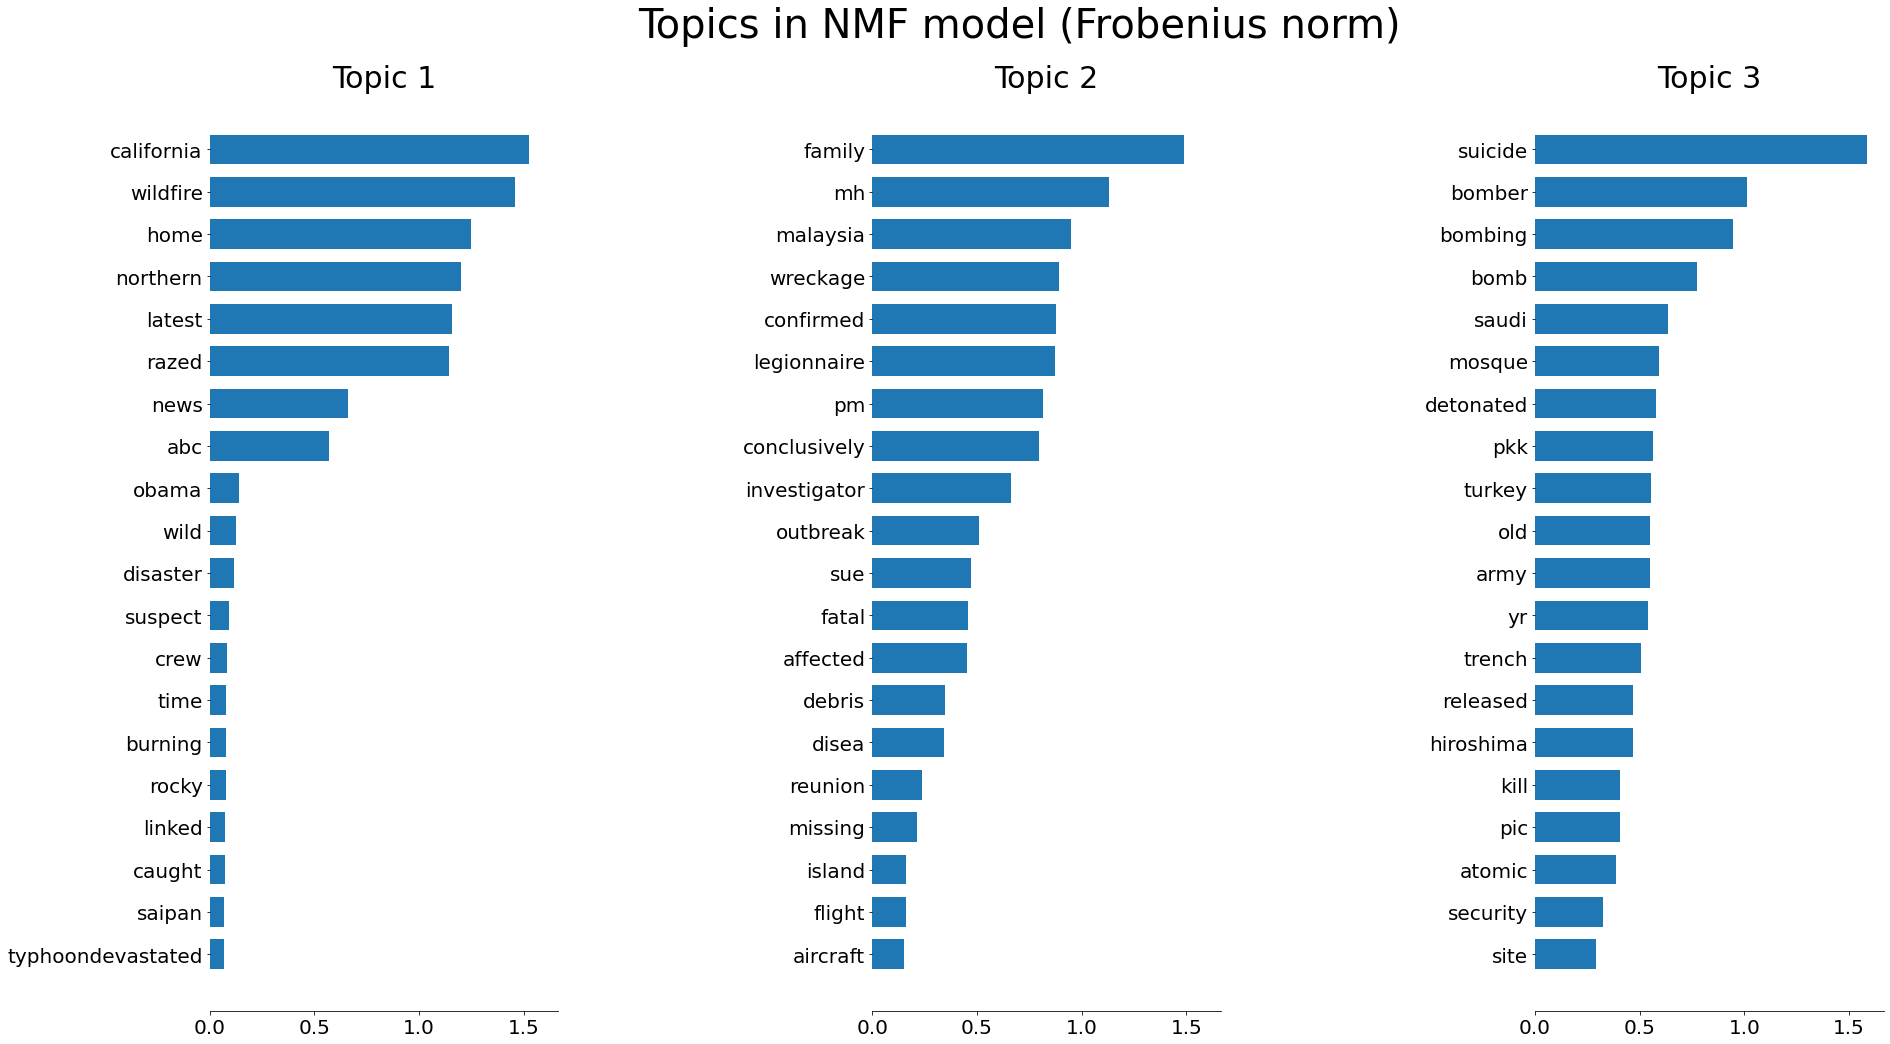



 Fitting the NMF model (generalized Kullback-Leibler divergence) with tf-idf features, n_samples=2000 and n_features=1000...


/home/dianavo/.pyenv/versions/3.8.12/envs/nlp_project/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:1422: FutureWarning: `alpha` was deprecated in version 1.0 and will be removed in 1.2. Use `alpha_W` and `alpha_H` instead
  warnings.warn(
/home/dianavo/.pyenv/versions/3.8.12/envs/nlp_project/lib/python3.8/site-packages/sklearn/decomposition/_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(


done in 0.977s.


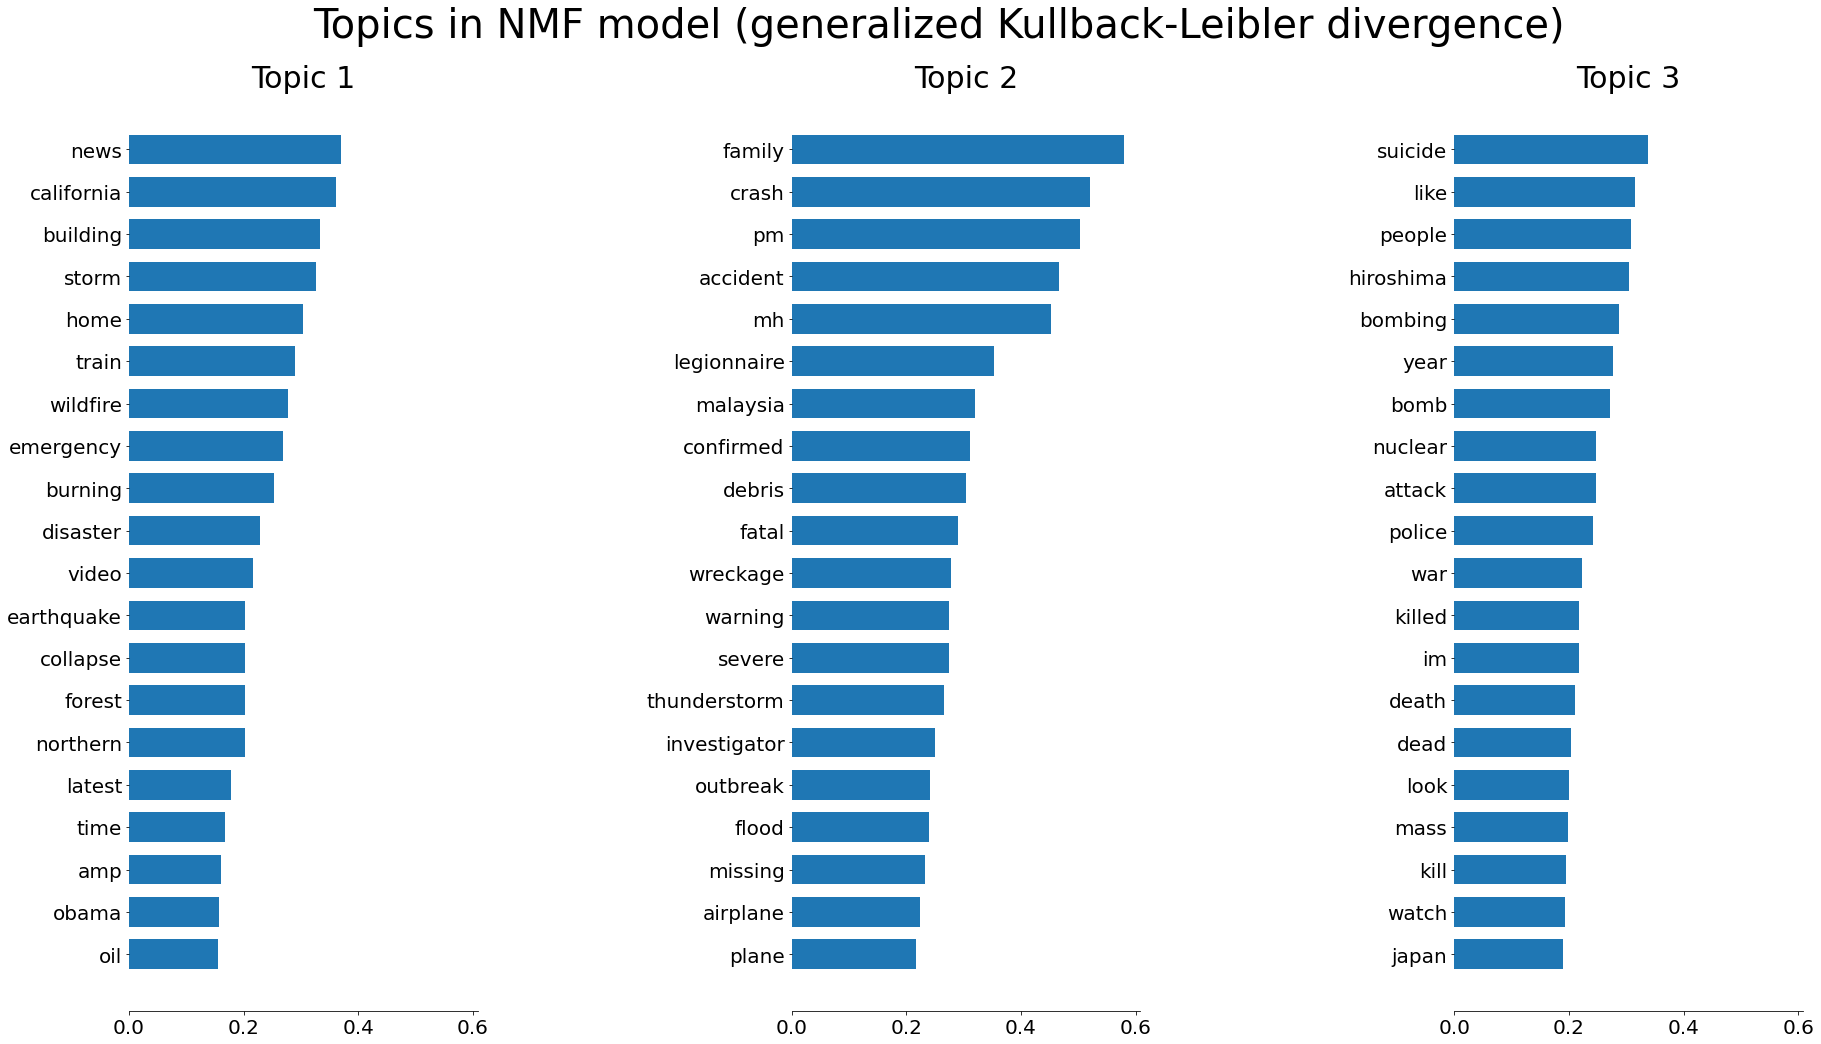



 Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 6.682s.


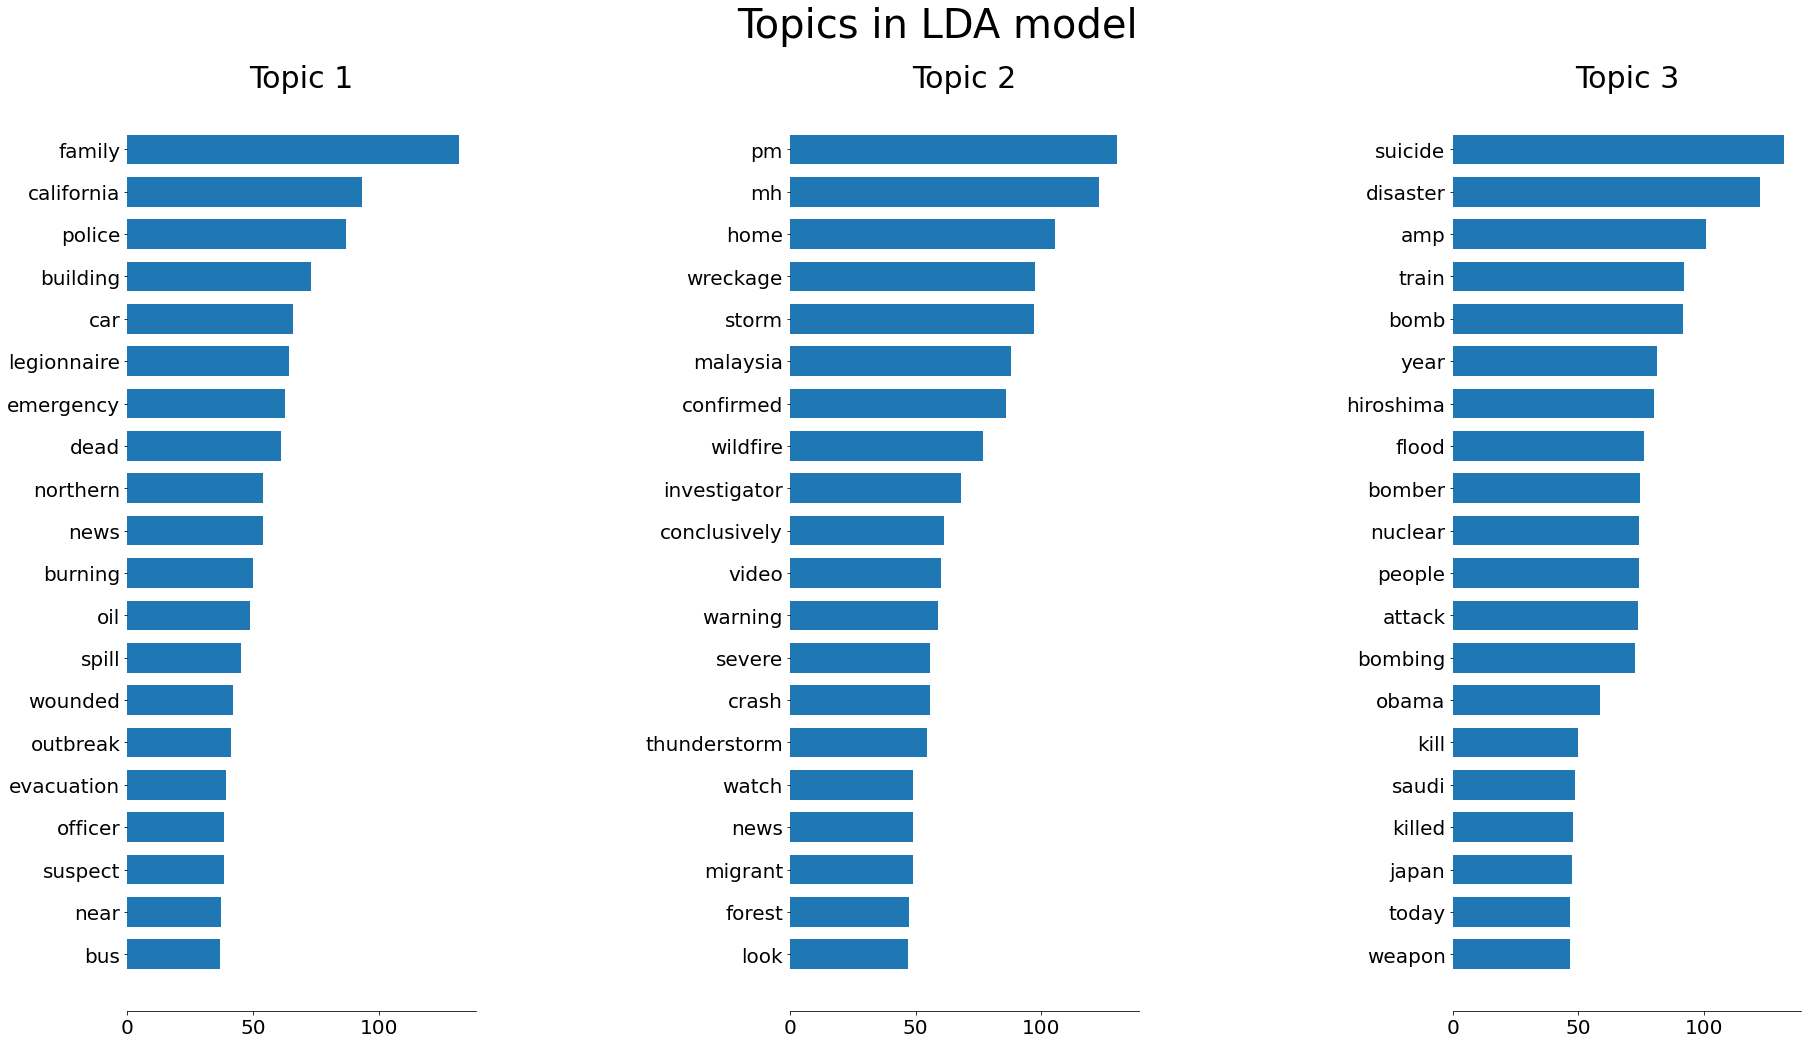

In [63]:

from time import time
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
from sklearn.datasets import fetch_20newsgroups

n_samples = 2000
n_features = 1000
n_components = 3
n_top_words = 20


def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(1, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

data_samples = list_tweet

# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))

# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(
    max_df=0.95, min_df=2, max_features=n_features, stop_words="english"
)
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
print()

# Fit the NMF model
print(
    "Fitting the NMF model (Frobenius norm) with tf-idf features, "
    "n_samples=%d and n_features=%d..." % (n_samples, n_features)
)
t0 = time()
nmf = NMF(n_components=n_components, random_state=1, alpha=0.1, l1_ratio=0.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))


tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf, tfidf_feature_names, n_top_words, "Topics in NMF model (Frobenius norm)"
)

# Fit the NMF model
print(
    "\n" * 2,
    "Fitting the NMF model (generalized Kullback-Leibler "
    "divergence) with tf-idf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
t0 = time()
nmf = NMF(
    n_components=n_components,
    random_state=1,
    beta_loss="kullback-leibler",
    solver="mu",
    max_iter=1000,
    alpha=0.1,
    l1_ratio=0.5,
).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
plot_top_words(
    nmf,
    tfidf_feature_names,
    n_top_words,
    "Topics in NMF model (generalized Kullback-Leibler divergence)",
)

print(
    "\n" * 2,
    "Fitting LDA models with tf features, n_samples=%d and n_features=%d..."
    % (n_samples, n_features),
)
lda = LatentDirichletAllocation(
    n_components=n_components,
    max_iter=5,
    learning_method="online",
    learning_offset=50.0,
    random_state=0,
)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

tf_feature_names = tf_vectorizer.get_feature_names_out()
plot_top_words(lda, tf_feature_names, n_top_words, "Topics in LDA model")

In [ ]:
# NMF Frobenius norm : done in 0.198s.
'topic 1' = 'urgence ou déjà passé' # 'wildfire', 'disaster', burning', 'typhoondevasted'
'topic 2' = 'urgence moyenne' # 'wreckage', 'fatal'
'topic 3' = 'déjà passé ?' # 'suicide', 'bomber', 'atomic', 'security', 'hiroshima'

# NMF generalized Kullback-Leiber divergence :  done in 0.977s.
'topic 1' = 'urgent'
'topic 2' = 'urgent' # same
'topic 3' = 'very urgent'

# LDA model :  Fitting done in 6.682s.
'topic 1' = 'suspect'
'topic 2' = 'disaster'
'topic 3' = 'red alert'

Visualize LDA model

In [99]:
# dictionary_LDA
from gensim import corpora, models
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
#lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

dictionary_LDA = corpora.Dictionary(list_tweet)
dictionary_LDA.filter_extremes(no_below=3)
corpus = [dictionary_LDA.doc2bow(list_of_tokens) for list_of_tokens in list_of_list_of_tokens]

visual = pyLDAvis.gensimvis.prepare(topic_model=lda_model, corpus=target_1, dictionary=dictionary_LDA)
# pyLDAvis.enable_notebook()
pyLDAvis.display(visual)

ModuleNotFoundError: No module named 'pyLDAvis'

In [101]:
from gensim import corpora
dictionary = corpora.Dictionary(list_tweet)
corpus = [dictionary.doc2bow(text) for text in list_tweet]

# We are asking LDA to find 5 topics in the data:
import gensim
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)
ldamodel.save('model5.gensim')

lda5 = gensim.models.ldamodel.LdaModel.load('model5.gensim')
lda_display5 = pyLDAvis.gensim.prepare(lda5, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display5)

TypeError: doc2bow expects an array of unicode tokens on input, not a single string